In [1]:
#downloading the dataset
!wget -nv "http://www.cse.chalmers.se/~richajo/dit862/data/all_sentiment_shuffled.txt"

2021-03-23 02:30:54 URL:http://www.cse.chalmers.se/~richajo/dit862/data/all_sentiment_shuffled.txt [9152324/9152324] -> "all_sentiment_shuffled.txt.1" [1]


In [71]:
#data processing

def read_docs(file_name):
  docs = []
  labels = []
  words = []

  with open(file_name, encoding='utf-8') as f:
    for line in f:
      docs.append(line[line.find('.txt')+5:])
      temp = line.strip().split()
      words.append(temp[3:])
      labels.append(temp[1])
  
  return docs,labels,words

In [72]:
docs, labels, words = read_docs('/content/all_sentiment_shuffled.txt')

In [73]:
import pandas as pd

review = pd.Series(docs)
label = pd.Series(labels)

review_data = pd.DataFrame({'review':review, 'label':label})
review_data

,review,label
0,i bought this album because i loved the title ...,neg
1,i was misled and thought i was buying the enti...,neg
2,"i have introduced many of my ell , high school...",neg
3,anything you purchase in the left behind serie...,pos
4,"i loved these movies , and i cant wiat for the...",pos
...,...,...
11909,the story here dose n't matter . the main char...,neg
11910,i liked everything about this product except i...,pos
11911,this flash is the perfect back-up for a studio...,pos
11912,i had boughten this as a gift which turned out...,neg


In [74]:
dummy_labels = []

label_map = {'pos':1,'neg':0}

for label in labels:
  dummy_labels.append(label_map[label])

review_data['category'] = pd.Series(dummy_labels)
review_data.drop(labels='label',axis=1)

,review,category
0,i bought this album because i loved the title ...,0
1,i was misled and thought i was buying the enti...,0
2,"i have introduced many of my ell , high school...",0
3,anything you purchase in the left behind serie...,1
4,"i loved these movies , and i cant wiat for the...",1
...,...,...
11909,the story here dose n't matter . the main char...,0
11910,i liked everything about this product except i...,1
11911,this flash is the perfect back-up for a studio...,1
11912,i had boughten this as a gift which turned out...,0


In [75]:
review_data['category'].value_counts()

1    6000
0    5914
Name: category, dtype: int64

In [76]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

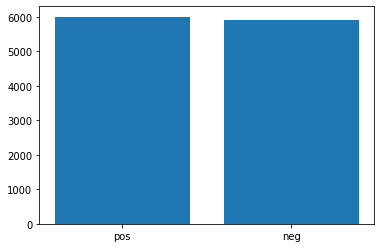

In [77]:
plt.bar(['pos','neg'],review_data['category'].value_counts())

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(review_data['review'], review_data['category'], test_size=0.20)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
def clean_review(review):

    review_tokens = review.split()
    review_tokens = [token for token in review_tokens if token.isalpha()]
    review_tokens = [word for word in review_tokens if word not in stopwords.words('english')]
    
    return review_tokens

In [84]:
cv = CountVectorizer(analyzer = clean_review)
X_train_nb = cv.fit_transform(X_train)

In [105]:
cv

CountVectorizer(analyzer=<function clean_review at 0x7f353e82aa70>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
vocab = cv.vocabulary_
vocab

In [122]:
len(vocab)

39333

In [85]:
X_test_nb = cv.transform(X_test)

In [86]:
X_train_nb

<9531x39333 sparse matrix of type '<class 'numpy.int64'>'
	with 492429 stored elements in Compressed Sparse Row format>

In [88]:
y_test.value_counts()

0    1214
1    1169
Name: category, dtype: int64

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_nb,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
y_pred = NB_classifier.predict(X_test_nb)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [94]:
import numpy as np
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([1241, 1142]))

In [95]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1214
           1       0.81      0.79      0.80      1169

    accuracy                           0.81      2383
   macro avg       0.81      0.81      0.81      2383
weighted avg       0.81      0.81      0.81      2383



In [97]:
confusion_matrix(y_test,y_pred)

array([[996, 218],
       [245, 924]])

In [98]:
accuracy_score(y_test,y_pred)

0.8057070919009651

In [99]:
from sklearn.model_selection import cross_val_score

In [102]:
cvs = cross_val_score(NB_classifier, X_train_nb, y_train, cv = 10)
cvs

array([0.81761006, 0.818468  , 0.79328437, 0.795383  , 0.81322141,
       0.80482686, 0.81427072, 0.76705142, 0.80377754, 0.77439664])

Text(0.5, 0, 'Folds')

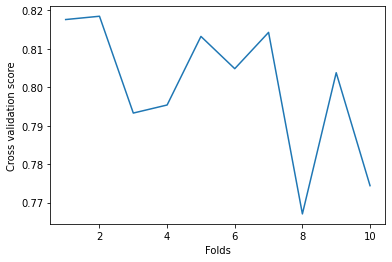

In [103]:
plt.plot(np.arange(1,11,1),cvs)
plt.ylabel('Cross validation score')
plt.xlabel('Folds')